In [ ]:
import random
import pandas as pd
import math

def sums(length, total_sum):
    if length == 1:
        yield [total_sum,]
    else:
        for value in range(total_sum + 1):
            for permutation in sums(length - 1, total_sum - value):
                yield [value,] + permutation

def init(battles, soldiers, num_of_pop):
  all = list(sums(battles,soldiers))
  return random.sample(all, num_of_pop)

def battle_win_state(battle1, battle2):
  extra = math.fabs(battle1 - battle2)
  if battle1 == battle2:
    return (0, extra)
  elif battle1 > battle2:
    return (1, extra)
  else:
    return (2, extra)

def colonel_war_simulate(colonel1, colonel2):
  score1, score2 = 0, 0
  for i in range(len(colonel1)):
    extra, win = battle_win_state(colonel1[i], colonel2[i])
    if win == 0:
      score1, score2 = score1 + 1, score2 + 1
    elif win == 1:
      score1 = score1 + 2
      colonel1 = redeploy(extra - 1, colonel1, i + 1)
    else:
      score2 = score2 + 2
      colonel2 = redeploy(extra - 1, colonel2, i + 1)
  return score1, score2

def redeploy(extra, colonel, index):
  if extra <= 1:
    return colonel
  colonel[index - 1] = colonel[index - 1] - extra
  for i in range(len(colonel) - 1):
    if extra == 0:
      break
    index = 0 if index >= len(colonel) else index
    amount = math.ceil(R_F * extra)
    colonel[index] = colonel[index] + amount
    extra = extra - amount
    index = index + 1
  return colonel

def colonel_win_state(colonel1, colonel2):
  score1, score2 = colonel_war_simulate(colonel1, colonel2)
  if score1 >= score2:
    return 1
  return 2

def fitness_function(chromosome, population):
  fitness = 0
  for p in population:
    if colonel_win_state(chromosome, p) == 1:
      fitness = fitness + 1
  return fitness

def _fitness_function(chromosome, population):
  fitness = 0
  for i, p in population:
    if colonel_win_state(chromosome, p) == 1:
      fitness = fitness + 1
  return fitness

def selection(num_of_chromosomes, population):
  current_member = 1
  parents = []
  while current_member <= num_of_chromosomes:
    subsample = random.sample(list(enumerate(population)), TOURNAMENT_BIN)
    parent = max(subsample, key= lambda x: _fitness_function(x[1], subsample))
    parents.append(parent)
    current_member = current_member + 1
  return parents
  
def crossover(parent1, parent2):
  point = random.randint(1, NUM_OF_BATTLES - 2)
  child1 = parent2[0:point] + parent1[point:]
  child2 = parent1[0:point] + parent2[point:]
  child1 = fix_child(child1)
  child2 = fix_child(child2)
  return child1, child2


def fix_child(child):
  genes_sum = sum(child)
  if genes_sum == NUM_OF_SOLDIERS:
    return child
  elif genes_sum < NUM_OF_SOLDIERS:
    needed = NUM_OF_SOLDIERS - genes_sum
    while needed > 0:
      min_index = child.index(min(child))
      child[min_index] = child[min_index] + 1
      needed = needed - 1
  else:
    extra = genes_sum - NUM_OF_SOLDIERS
    while extra > 0:
      max_index = child.index(max(child))
      child[max_index] = child[max_index] - 1
      extra = extra - 1
  return child

def mutation1(child):
  if random.randint(1,100) <= MUTATION_PROB:
    idx1 = random.randint(0, NUM_OF_BATTLES - 1)
    idx2 = random.randint(0, NUM_OF_BATTLES - 1)
    temp = child[idx1]
    child[idx1] = child[idx2]
    child[idx2] = temp
  return child

def survival_selection(child1, child2, p1_index, p2_index, population):
  fitness_list = pd.Series([fitness_function(x, population) for x in population])
  elites_idx = fitness_list.nlargest(NUM_OF_ELITES).index.values.tolist()
  log(elites_idx[0], fitness_list, population)
  ch1_fitness, ch2_fitness = fitness_function(child1, population), fitness_function(child2, population)
  p1_fitness, p2_fitness = fitness_function(population[p1_index], population), fitness_function(population[p2_index], population)
  if p1_index not in elites_idx or p1_fitness < ch1_fitness:
    population[p1_index] = child1
  if p2_index not in elites_idx or p2_fitness < ch2_fitness:
    population[p2_index] = child2
  return population

def log(best_fitness_idx, fitness_list, population):
  best_fitness_log.append(fitness_list[best_fitness_idx])
  fitness_mean_log.append(fitness_list.mean())
  best_strategy_log.append(population[best_fitness_idx])


def train(iteration, population):
  while iteration>0:
    parents = selection(2, population)
    child1, child2 = crossover(parents[0][1], parents[1][1])
    child1, child2 = mutation1(child1), mutation1(child2)
    population = survival_selection(child1, child2, parents[0][0], parents[1][0], population)
    iteration = iteration - 1

NUM_OF_BATTLES = 4
NUM_OF_SOLDIERS = 20
NUM_OF_POPULATION = 50
TOURNAMENT_BIN = 10
ELITISM_PROB = 10/100
NUM_OF_ELITES = int(NUM_OF_POPULATION * ELITISM_PROB)
MUTATION_PROB = 80
R_F = 0.5
best_fitness_log = []
fitness_mean_log = []
best_strategy_log = []

population = init(NUM_OF_BATTLES, NUM_OF_SOLDIERS, NUM_OF_POPULATION)
train(100, population)

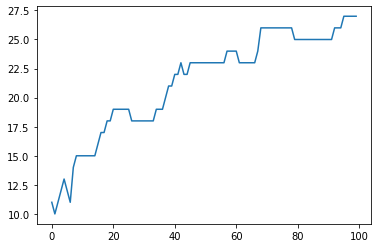

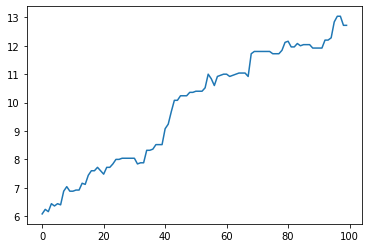

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(best_fitness_log))), best_fitness_log)
plt.show()
plt.plot(list(range(len(fitness_mean_log))), fitness_mean_log)
plt.show()

In [ ]:
best_strategy_log

[[1, 3, 7, 9],
 [1, 3, 7, 9],
 [1, 3, 7, 9],
 [1, 3, 7, 9],
 [1, 1, 8, 10],
 [1, 1, 8, 10],
 [1, 1, 8, 10],
 [4, 4, 8, 4],
 [14, 2, 2, 2],
 [14, 2, 2, 2],
 [14, 2, 2, 2],
 [14, 2, 2, 2],
 [14, 2, 2, 2],
 [4, 3, 10, 3],
 [4, 3, 10, 3],
 [4, 3, 10, 3],
 [4, 3, 10, 3],
 [4, 3, 10, 3],
 [4, 4, 8, 4],
 [4, 4, 8, 4],
 [4, 6, 2, 8],
 [4, 6, 2, 8],
 [4, 6, 2, 8],
 [4, 6, 2, 8],
 [4, 6, 2, 8],
 [4, 6, 2, 8],
 [4, 6, 2, 8],
 [4, 6, 2, 8],
 [5, 4, 7, 4],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6],
 [5, 4, 5, 6]]

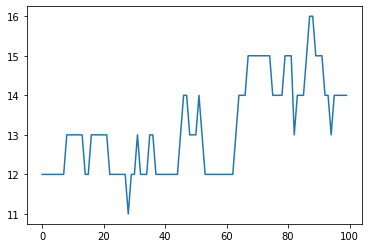

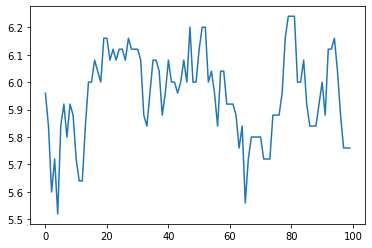

In [3]:
import random
import pandas as pd
import math

def sums(length, total_sum):
    if length == 1:
        yield [total_sum,]
    else:
        for value in range(total_sum + 1):
            for permutation in sums(length - 1, total_sum - value):
                yield [value,] + permutation

def init(battles, soldiers, num_of_pop):
  all = list(sums(battles,soldiers))
  return random.sample(all, num_of_pop)

def battle_win_state(battle1, battle2):
  extra = math.fabs(battle1 - battle2)
  if battle1 == battle2:
    return (0, extra)
  elif battle1 > battle2:
    return (1, extra)
  else:
    return (2, extra)

def colonel_war_simulate(colonel1, colonel2):
  score1, score2 = 0, 0
  for i in range(len(colonel1)):
    extra, win = battle_win_state(colonel1[i], colonel2[i])
    if win == 0:
      score1, score2 = score1 + 1, score2 + 1
    elif win == 1:
      score1 = score1 + 2
      colonel1 = redeploy(extra - 1, colonel1, i + 1)
    else:
      score2 = score2 + 2
      colonel2 = redeploy(extra - 1, colonel2, i + 1)
  return score1, score2

def redeploy(extra, colonel, index):
  if extra <= 1:
    return colonel
  colonel[index - 1] = colonel[index - 1] - extra
  for i in range(len(colonel) - 1):
    if extra == 0:
      break
    index = 0 if index >= len(colonel) else index
    amount = math.ceil(R_F * extra)
    colonel[index] = colonel[index] + amount
    extra = extra - amount
    index = index + 1
  return colonel

def colonel_win_state(colonel1, colonel2):
  score1, score2 = colonel_war_simulate(colonel1, colonel2)
  if score1 >= score2:
    return 1
  return 2

def fitness_function(chromosome, population):
  fitness = 0
  for p in population:
    if colonel_win_state(chromosome, p) == 1:
      fitness = fitness + 1
  return fitness

def _fitness_function(chromosome, population):
  fitness = 0
  for i, p in population:
    if colonel_win_state(chromosome, p) == 1:
      fitness = fitness + 1
  return fitness

def selection(num_of_chromosomes, population):
  current_member = 1
  parents = []
  while current_member <= num_of_chromosomes:
    subsample = random.sample(list(enumerate(population)), TOURNAMENT_BIN)
    parent = max(subsample, key= lambda x: _fitness_function(x[1], subsample))
    parents.append(parent)
    current_member = current_member + 1
  return parents
  
def crossover(parent):
  point1 = random.randint(0, NUM_OF_BATTLES - 1)
  point2 = random.randint(0, NUM_OF_BATTLES - 1)
  child = parent.copy()
  temp = child[point1]
  child[point1] = child[point2]
  child[point2] = temp
  return child

def mutation(child):
  if random.randint(1,100) <= MUTATION_PROB:
    point1 = random.randint(0, NUM_OF_BATTLES - 1)
    point2 = random.randint(0, NUM_OF_BATTLES - 1)
    if child[point1] > 0:
      child[point1] -= 1
      child[point2] += 1
  return child

def survival_selection(child1, child2, p1_index, p2_index, population):
  fitness_list = pd.Series([fitness_function(x, population) for x in population])
  elites_idx = fitness_list.nlargest(NUM_OF_ELITES).index.values.tolist()
  log(elites_idx[0], fitness_list, population)
  ch1_fitness, ch2_fitness = fitness_function(child1, population), fitness_function(child2, population)
  p1_fitness, p2_fitness = fitness_function(population[p1_index], population), fitness_function(population[p2_index], population)
  if p1_index not in elites_idx or p1_fitness < ch1_fitness:
    population[p1_index] = child1
  if p2_index not in elites_idx or p2_fitness < ch2_fitness:
    population[p2_index] = child2
  return population

def log(best_fitness_idx, fitness_list, population):
  best_fitness_log.append(fitness_list[best_fitness_idx])
  fitness_mean_log.append(fitness_list.mean())
  best_strategy_log.append(population[best_fitness_idx])


def train(iteration, population):
  while iteration>0:
    parents = selection(2, population)
    child1, child2 = crossover(parents[0][1]), crossover(parents[1][1])
    child1, child2 = mutation(child1), mutation(child2)
    population = survival_selection(child1, child2, parents[0][0], parents[1][0], population)
    iteration = iteration - 1

NUM_OF_BATTLES = 4
NUM_OF_SOLDIERS = 20
NUM_OF_POPULATION = 50
TOURNAMENT_BIN = 10
ELITISM_PROB = 10/100
NUM_OF_ELITES = int(NUM_OF_POPULATION * ELITISM_PROB)
MUTATION_PROB = 80
R_F = 0.5
best_fitness_log = []
fitness_mean_log = []
best_strategy_log = []

population = init(NUM_OF_BATTLES, NUM_OF_SOLDIERS, NUM_OF_POPULATION)
train(100, population)
import matplotlib.pyplot as plt
plt.plot(list(range(len(best_fitness_log))), best_fitness_log)
plt.show()
plt.plot(list(range(len(fitness_mean_log))), fitness_mean_log)
plt.show()

In [7]:
print(best_strategy_log)

[[10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [5, 6, 2, 7], [5, 6, 3, 6], [5, 6, 3, 6], [5, 6, 2, 7], [5, 6, 2, 7], [5, 6, 2, 7], [5, 6, 2, 7], [5, 6, 2, 7], [5, 7, 6, 2], [5, 6, 2, 7], [5, 6, 2, 7], [5, 7, 6, 2], [5, 7, 6, 2], [5, 7, 6, 2], [5, 7, 6, 2], [5, 7, 6, 2], [5, 7, 6, 2], [5, 7, 6, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [10, 3, 5, 2], [7, 5, 3, 5], [7, 5, 3, 5], [10, 3, 5, 2], [7, 5, 3, 5], [10, 3, 5, 2], [10, 3, 5, 2], [5, 7, 3, 5], [5, 7, 3, 5], [5, 7, 3, 5], [5, 7, 3, 5], [5, 7, 3, 5], [5, 7, 3, 5], [5, 7, 3, 5], [5, 7, 3, 5], [7, 5, 3, 5], [7, 5, 3, 5], [7, 5, 3, 5], [7, 5, 3, 5], [5, 6, 2, 7], [5, 6, 2, 7], [5, 6, 2, 7], [7, 5, 3, 5], [7, 5, 3, 5], [7, 5, 3, 5], [7, 5, 3, 5], [7, 5, 3, 5], [7, 5, 3, 5], [7, 5, 3, 5], [3, 2, 10, 5], [3, 2, 10, 5], [3, 2, 10, 5], [3, 2, 10, 5], [3, 2, 10, 5], [3, 2, 10, 5], [3, 2, 